***RANDOM FOREST REGRESSOR***

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import pandas as pd

df = pd.read_pickle('data/processed/processed_reliance_data.pk1')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2368 entries, 2015-05-29 to 2024-12-31
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Close              2368 non-null   float64
 1   High               2368 non-null   float64
 2   Low                2368 non-null   float64
 3   Open               2368 non-null   float64
 4   Volume             2368 non-null   int64  
 5   Daily Returns      2368 non-null   float64
 6   Price Range        2368 non-null   float64
 7   Range %            2368 non-null   float64
 8   MA5                2368 non-null   float64
 9   MA10               2368 non-null   float64
 10  MA20               2368 non-null   float64
 11  MA50               2368 non-null   float64
 12  MA100              2368 non-null   float64
 13  StdDev5            2368 non-null   float64
 14  StdDev10           2368 non-null   float64
 15  Lag_1              2368 non-null   float64
 16  Lag_2 

In [140]:
# Prepare features and target
X = df[['Volume', 'Daily Returns','Lag_2']]
y = df['Close']

# Time-based split to avoid lookahead bias
train_size = int(0.8 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [141]:
# Initialize and train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [142]:
# Predictions
predictions = model.predict(X_test)

In [143]:
# Evaluation
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R²: {r2:.4f}")

Random Forest MSE: 18344.46
Random Forest R²: 0.2199


In [144]:
from sklearn.metrics import mean_squared_error
import numpy as np

train_mse =  mean_squared_error(y_train, model.predict(X_train))
test_mse =  mean_squared_error(y_test, model.predict(X_test))

print("Train RMSE:", np.sqrt(train_mse))
print("Test RMSE:", np.sqrt(test_mse))

Train RMSE: 5.501198567969201
Test RMSE: 135.44173156339198


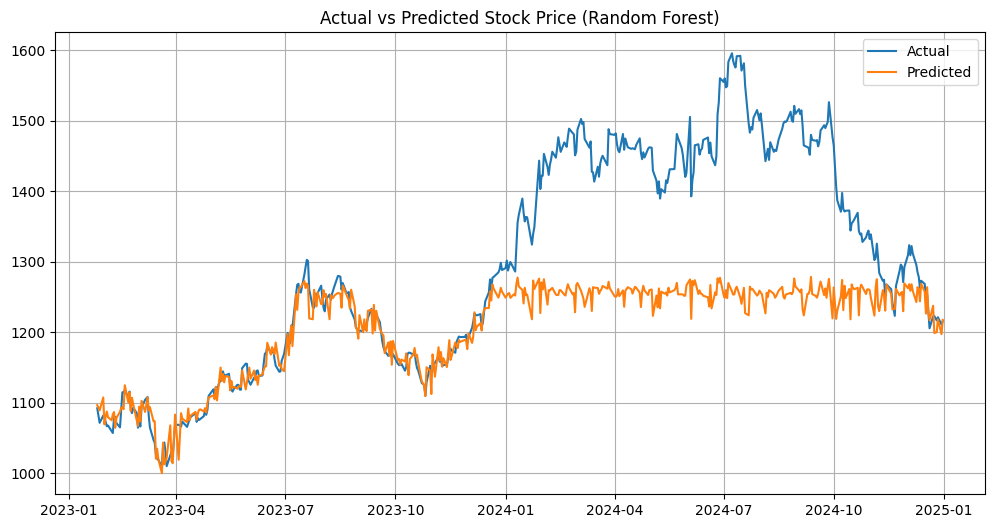

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.title("Actual vs Predicted Stock Price (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()


In [146]:
print(X_train.index.min(), X_train.index.max())
print(X_test.index.min(), X_test.index.max())


2015-05-29 00:00:00 2023-01-24 00:00:00
2023-01-25 00:00:00 2024-12-31 00:00:00


In [147]:
X_train.head()

Price,Volume,Daily Returns,Lag_2
Date,,,
2015-05-29,29277517,0.001370,196.731308
2015-06-01,19594976,0.028791,194.620224
2015-06-02,20178960,-0.003990,194.886902
2015-06-03,15546279,-0.002559,200.497925
2015-06-04,15931395,0.018241,199.697937


***RIDGE REGRESSION***

In [158]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Ridge Regression model with alpha (regularization strength)
ridge_model = Ridge(alpha=1.0)

In [161]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)



In [163]:
# Fit model on training data
ridge_model.fit(X_train_scaled_df, y_train)

# Predict on test set
ridge_preds = ridge_model.predict(X_test_scaled_df)

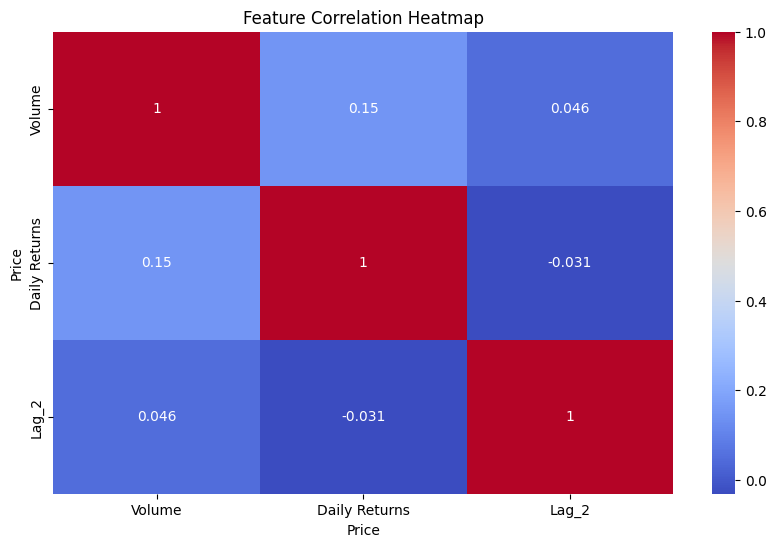

In [164]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(X_train_scaled_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [165]:
# Evaluate performance
print("Ridge Train RMSE:", mean_squared_error(y_train, ridge_model.predict(X_train_scaled_df)))
print("Ridge Test RMSE:", mean_squared_error(y_test, ridge_preds))
print("R2 Score:", r2_score(y_test, ridge_preds))

Ridge Train RMSE: 199.3362342390176
Ridge Test RMSE: 354.9603612954276
R2 Score: 0.9849052152178498


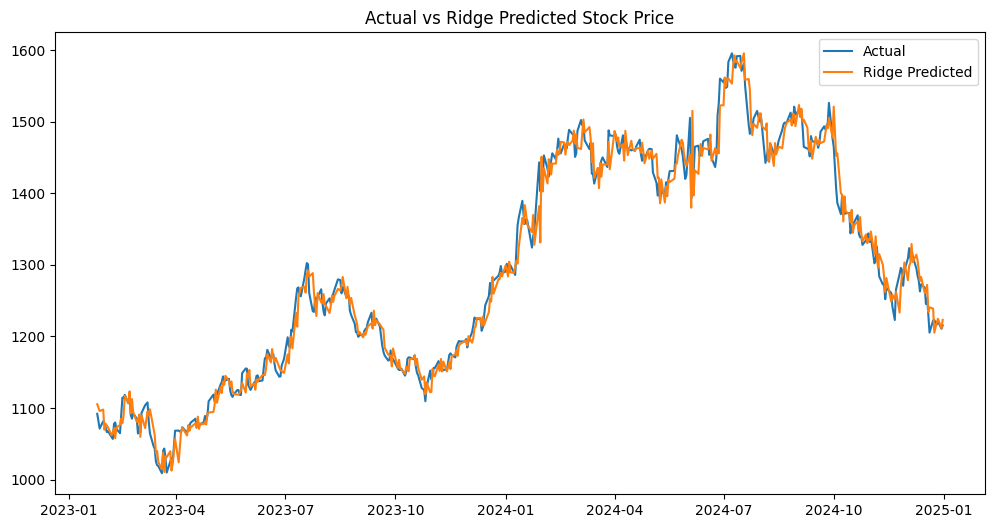

In [166]:
# Plot predictions
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, ridge_preds, label='Ridge Predicted')
plt.title("Actual vs Ridge Predicted Stock Price")
plt.legend()
plt.show()

***LASSO REGRESSION***

In [167]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [168]:
# Assuming df is your DataFrame and you've done feature engineering
X = df[['Volume', 'Daily Returns', 'Lag_2']]  # Use your final selected features
y = df['Close']

In [169]:
# Split using time-based approach
train_size = int(0.8 * len(df))
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


In [170]:
# Convert y to numpy arrays for compatibility
y_train = y_train.values
y_test = y_test.values

In [171]:
# Scale features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


In [ ]:
# Lasso Regression
#lasso = Lasso(alpha=0.1)
#lasso.fit(X_train_scaled, y_train)
lasso = Lasso(alpha=10)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=10)

In [204]:
# Predictions
y_pred = lasso.predict(X_test_scaled)
y_train_pred = lasso.predict(X_train_scaled)


In [205]:
# Metrics
rmse_train = mean_squared_error(y_train, y_train_pred)
rmse_test = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Lasso Train RMSE: {rmse_train:.2f}")
print(f"Lasso Test RMSE: {rmse_test:.2f}")
print(f"R² Score: {r2:.4f}")

Lasso Train RMSE: 405.75
Lasso Test RMSE: 915.65
R² Score: 0.9611


In [206]:
# Reconvert predictions to DataFrame with matching index
y_test_df = pd.Series(y_test, index=X_test.index, name='Actual')
y_pred_df = pd.Series(y_pred, index=X_test.index, name='Predicted')

# Combine for visualization
compare_df = pd.concat([y_test_df, y_pred_df], axis=1)


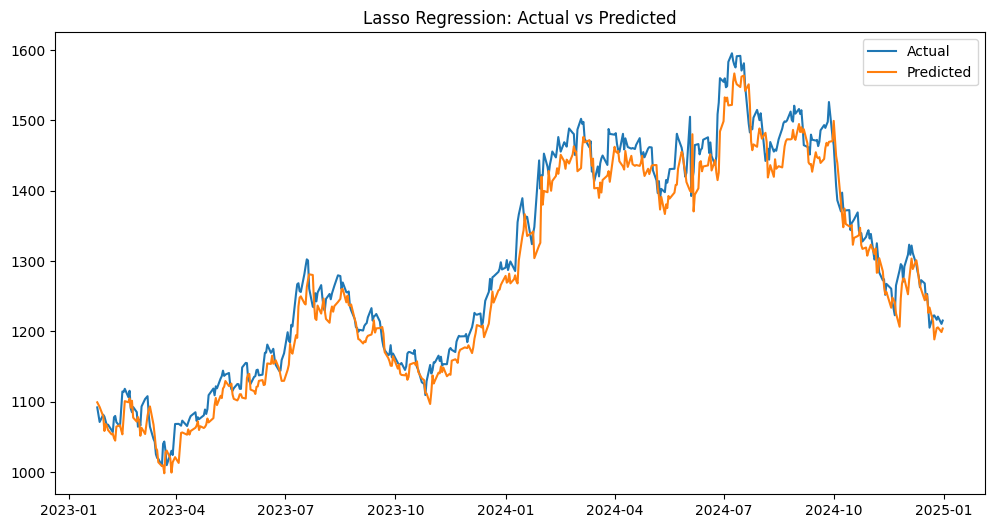

In [207]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(compare_df.index, compare_df['Actual'], label='Actual')
plt.plot(compare_df.index, compare_df['Predicted'], label='Predicted')
plt.title("Lasso Regression: Actual vs Predicted")
plt.legend()
plt.show()

In [237]:
from sklearn.linear_model import ElasticNet

# Step 1: Define the model with alpha = 10, l1_ratio = 0.5 (equal L1 & L2 mix)
'''for alpha in [0.1, 1, 5]:
    for l1_ratio in [0.1, 0.5, 0.9]:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"alpha={alpha}, l1_ratio={l1_ratio} => RMSE: {rmse:.2f}, R²: {r2:.4f}")'''

elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=42)


In [243]:
# Step 2: Fit the model
elastic_model.fit(X_train_scaled, y_train)

# Step 3: Predict
train_preds = elastic_model.predict(X_train_scaled)
y_pred_elastic = elastic_model.predict(X_test_scaled)



In [239]:
# Step 4: Evaluation
train_pred_elastic = elastic_model.predict(X_train_scaled)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred_elastic))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
r2 = r2_score(y_test, y_pred_elastic)

print(f"ElasticNet Train RMSE: {train_rmse:.2f}")
print(f"ElasticNet Test RMSE: {test_rmse:.2f}")
print(f"R² Score: {r2:.4f}")

ElasticNet Train RMSE: 14.54
ElasticNet Test RMSE: 20.12
R² Score: 0.9828


In [240]:
# Reconvert predictions to DataFrame with matching index
y_test_df = pd.Series(y_test, index=X_test.index, name='Actual')
y_pred_df = pd.Series(y_pred, index=X_test.index, name='Predicted')

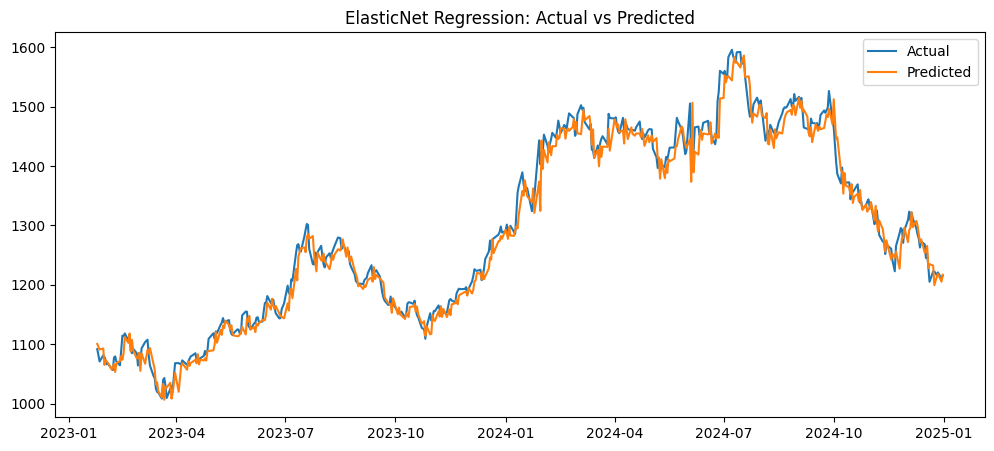

In [241]:
# Step 5: Plotting
plt.figure(figsize=(12, 5))
plt.plot(y_test_df.index, y_test_df.values, label='Actual')
plt.plot(y_test_df.index, y_pred_elastic, label='Predicted')
plt.title("ElasticNet Regression: Actual vs Predicted")
plt.legend()
plt.show()

In [244]:
# Residuals = Actual - Predicted
train_residuals = y_train - train_preds
test_residuals = y_test - y_pred_elastic


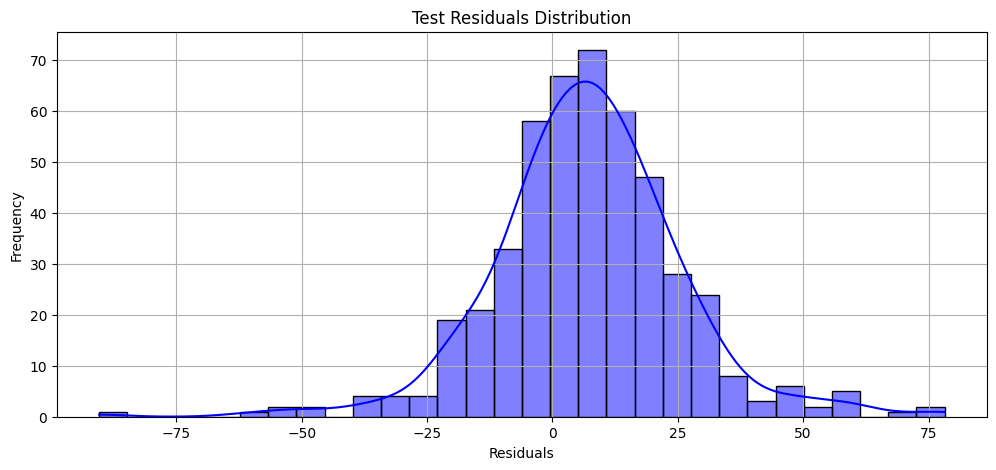

In [246]:
# Residuals Distribution
plt.figure(figsize=(12, 5))
sns.histplot(test_residuals, bins=30, kde=True, color='blue')
plt.title("Test Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


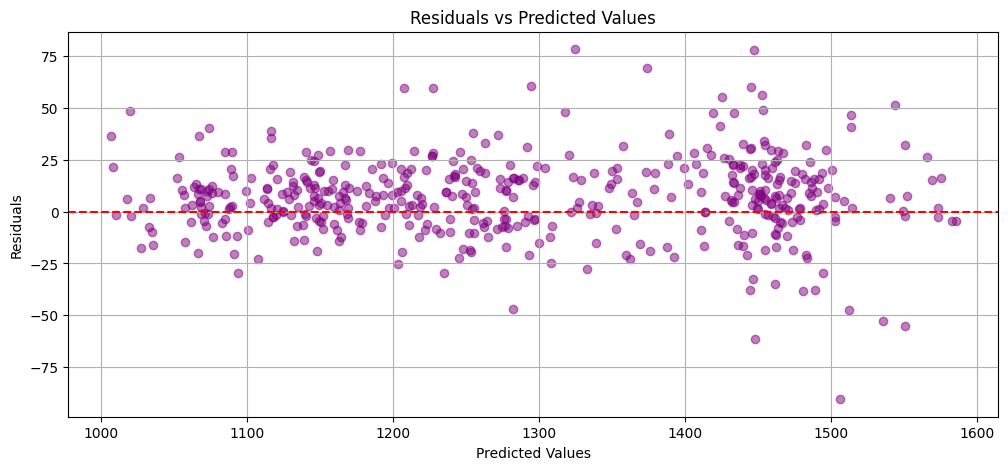

In [247]:
plt.figure(figsize=(12, 5))
plt.scatter(y_pred_elastic, test_residuals, alpha=0.5, color='purple')
plt.axhline(0, linestyle='--', color='red')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


In [249]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Dictionary to store results
results = []

# Define a helper function
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)

    results.append({
        'Model': name,
        'Train RMSE': round(train_rmse, 2),
        'Test RMSE': round(test_rmse, 2),
        'R² Score (Test)': round(r2, 4)
    })

# Call this function after fitting each model
# Example (assumes you've already fitted models like linear_model, ridge_model, etc.)
evaluate_model('Ridge Regression', ridge_model, X_train_scaled, X_test_scaled, y_train, y_test)
evaluate_model('Lasso Regression', lasso, X_train_scaled, X_test_scaled, y_train, y_test)
evaluate_model('ElasticNet (α=0.1, l1=0.9)', elastic_model, X_train_scaled, X_test_scaled, y_train, y_test)

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display the summary
print(results_df.sort_values(by='Test RMSE'))


                        Model  Train RMSE  Test RMSE  R² Score (Test)
0            Ridge Regression       14.12      18.84           0.9849
2  ElasticNet (α=0.1, l1=0.9)       14.54      20.12           0.9828
1            Lasso Regression       20.14      30.26           0.9611
